### <b>Apriori - Association rules - Market Basket Optimisation - Author of algorithm: R. Agrawal and R. Srikant, 1994.</b>

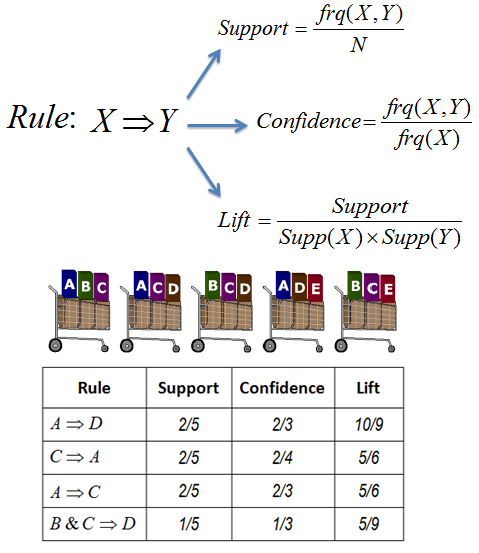
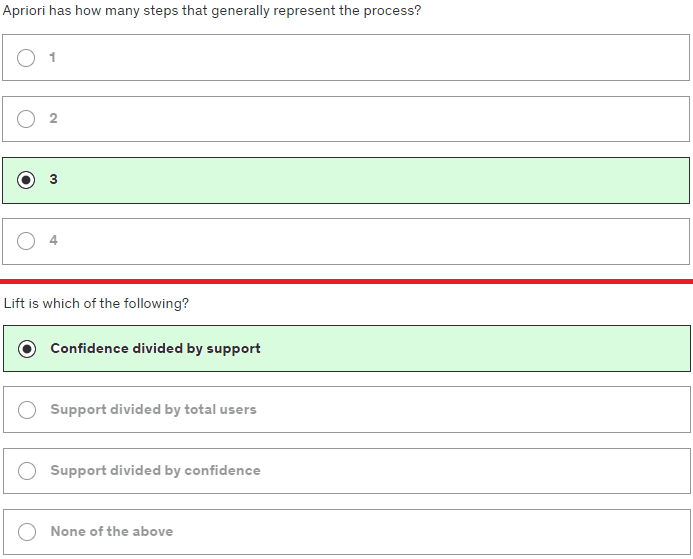
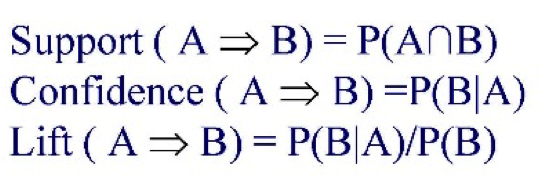
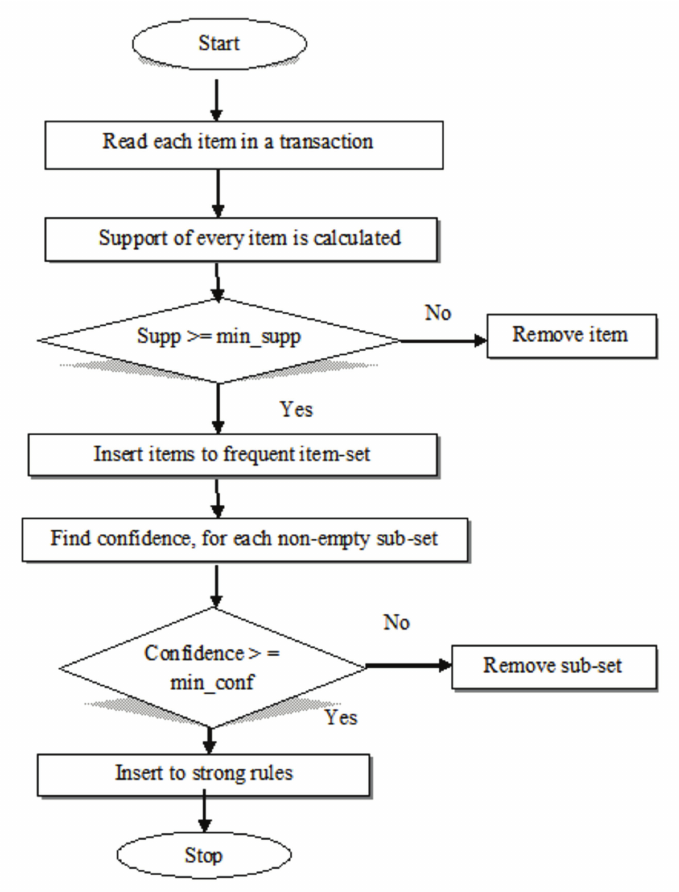
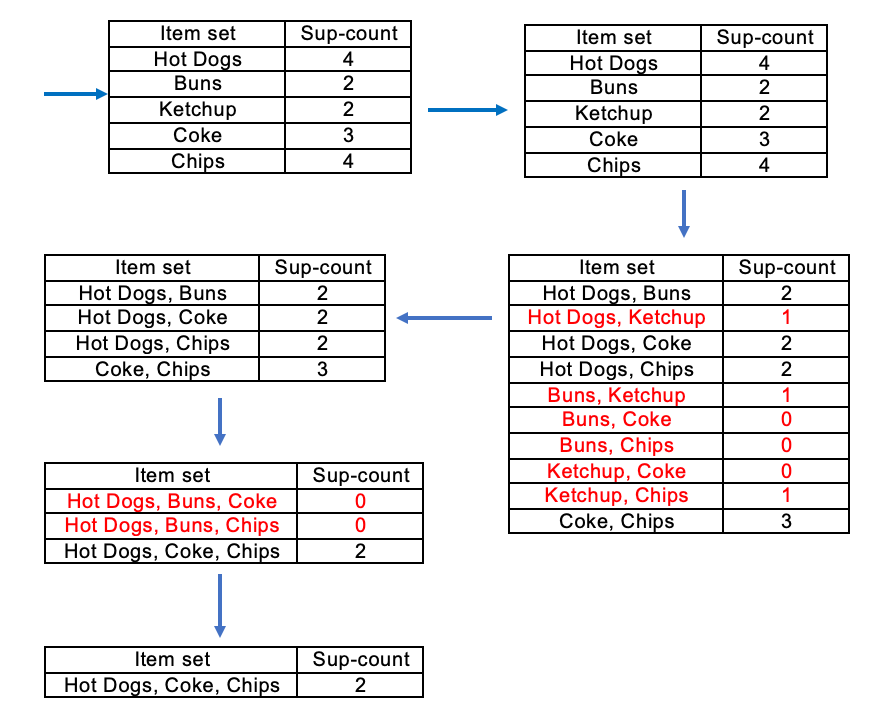
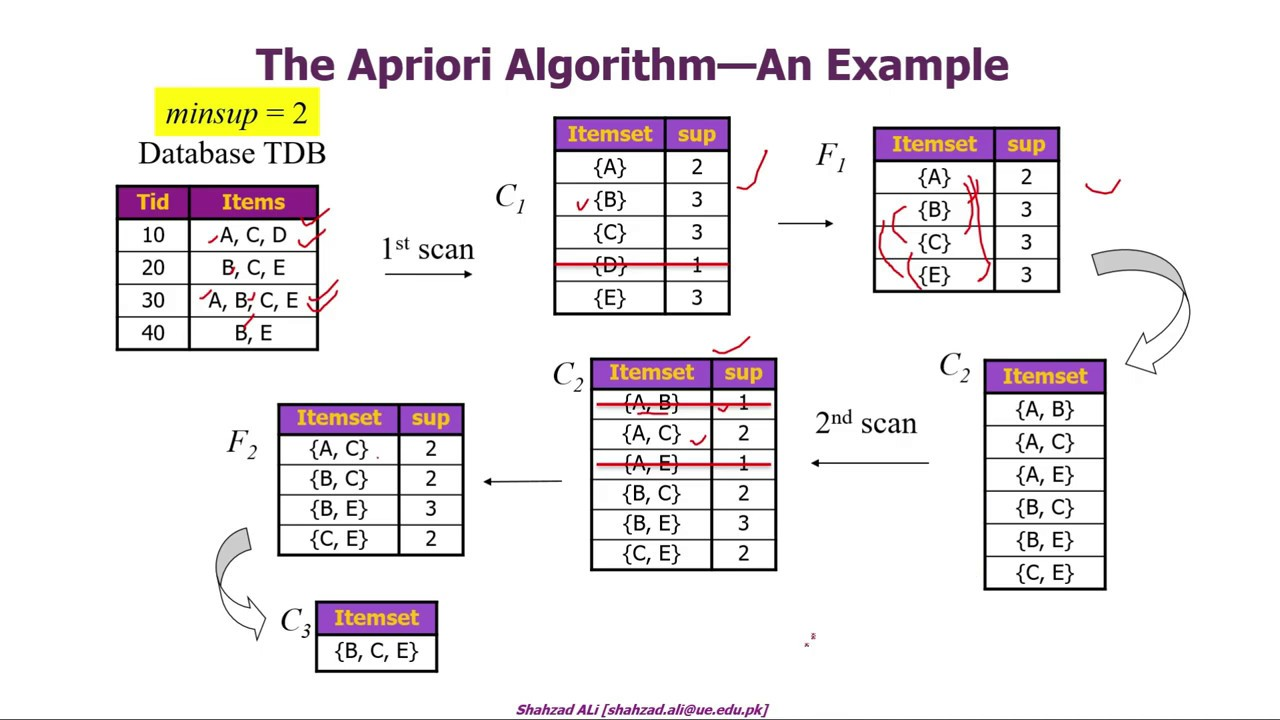

### <b>Data preprocessing</b>

In [77]:
!pip install apyori


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [78]:
from apyori import apriori
import pandas as pd

In [79]:
dataset = pd.read_csv("Market_Basket_optimisation.csv", header=None)
number_of_transactions = len(dataset)
number_of_products = len(dataset.columns)

print(f"1. Number of transactions: {number_of_transactions}\n")
print(f"2. Number of products: {number_of_products}\n")
print(f"3. Dataset: \n{dataset}\n")

transactions = []
for i in range(0, number_of_transactions):
    transactions.append([str(dataset.values[i, j]) for j in range(0, number_of_products)])
print(f"4. Transactions: \n{transactions}\n")

1. Number of transactions: 7501

2. Number of products: 20

3. Dataset: 
                 0                  1            2                 3   \
0            shrimp            almonds      avocado    vegetables mix   
1           burgers          meatballs         eggs               NaN   
2           chutney                NaN          NaN               NaN   
3            turkey            avocado          NaN               NaN   
4     mineral water               milk   energy bar  whole wheat rice   
...             ...                ...          ...               ...   
7496         butter         light mayo  fresh bread               NaN   
7497        burgers  frozen vegetables         eggs      french fries   
7498        chicken                NaN          NaN               NaN   
7499       escalope          green tea          NaN               NaN   
7500           eggs    frozen smoothie  yogurt cake    low fat yogurt   

                4                 5     6         

### <b>Training the Apriori model on the dataset</b>

In [80]:
rules = apriori(transactions = transactions, 
                min_support = 0.003, min_confidence = 0.2, min_lift = 3,
                min_length = 2, max_length = 2)

### <b>Visualizing the results/rules</b>

In [81]:
def create_report(results):
    lhs = [tuple(result[2][0][0])[0] for result in results]
    rhs = [tuple(result[2][0][1])[0] for result in results]
    supports = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts = [result[2][0][3] for result in results]
    report = list(zip(lhs, rhs, supports, confidences, lifts))
    column_names = ["Left Hand Side", "Right Hand Side", "Support", "Confidence", "Lift"]
    return pd.DataFrame(report, columns = column_names)

results_in_data_frame = create_report(list(rules))

results_in_data_frame

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,light cream,chicken,0.004533,0.290598,4.843951
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
2,pasta,escalope,0.005866,0.372881,4.700812
3,fromage blanc,honey,0.003333,0.245098,5.164271
4,herb & pepper,ground beef,0.015998,0.323450,3.291994
5,tomato sauce,ground beef,0.005333,0.377358,3.840659
6,light cream,olive oil,0.003200,0.205128,3.114710
7,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
8,pasta,shrimp,0.005066,0.322034,4.506672


### <b>Sorting by descending lifts</b>

In [82]:
results_in_data_frame.nlargest(n = 10, columns = 'Lift')

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
3,fromage blanc,honey,0.003333,0.245098,5.164271
0,light cream,chicken,0.004533,0.290598,4.843951
2,pasta,escalope,0.005866,0.372881,4.700812
8,pasta,shrimp,0.005066,0.322034,4.506672
7,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
5,tomato sauce,ground beef,0.005333,0.377358,3.840659
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
4,herb & pepper,ground beef,0.015998,0.323450,3.291994
6,light cream,olive oil,0.003200,0.205128,3.114710
